# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Import API key
from api_keys_use import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# set up lists to hold reponse info
lat = []
lon = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date= []
city_name = []
counter=0


# Loop through the list of cities and perform a request for data on each

print("--------------------------")
print("Begin Data Retriaval")
print("--------------------------")
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        counter = counter + 1
        print(f"Processing Record # {counter}: {city} ")
    except KeyError:
            print("City not found, Skipping")
print("--------------------------")
print("Data Retriaval Complete")
print("--------------------------")
    

--------------------------
Begin Data Retriaval
--------------------------
Processing Record # 1: malinyi 
Processing Record # 2: payo 
Processing Record # 3: barrow 
Processing Record # 4: rikitea 
Processing Record # 5: bondo 
Processing Record # 6: half moon bay 
City not found, Skipping
Processing Record # 7: nautla 
Processing Record # 8: marzuq 
Processing Record # 9: belle fourche 
Processing Record # 10: talaya 
Processing Record # 11: kapaa 
Processing Record # 12: oranjestad 
City not found, Skipping
City not found, Skipping
Processing Record # 13: atuona 
Processing Record # 14: port hardy 
Processing Record # 15: busselton 
Processing Record # 16: butaritari 
Processing Record # 17: noumea 
Processing Record # 18: san juan de los morros 
Processing Record # 19: nehe 
Processing Record # 20: dandong 
Processing Record # 21: ushuaia 
Processing Record # 22: thompson 
Processing Record # 23: meulaboh 
Processing Record # 24: nanortalik 
Processing Record # 25: tam ky 
Processi

Processing Record # 220: dorchester 
Processing Record # 221: norman wells 
Processing Record # 222: linjiang 
Processing Record # 223: paysandu 
Processing Record # 224: jumla 
Processing Record # 225: ballina 
Processing Record # 226: rawlins 
Processing Record # 227: kudahuvadhoo 
Processing Record # 228: havoysund 
Processing Record # 229: vestmannaeyjar 
Processing Record # 230: anadyr 
Processing Record # 231: bulgan 
Processing Record # 232: jalandhar 
City not found, Skipping
Processing Record # 233: tura 
Processing Record # 234: plouzane 
Processing Record # 235: hajnowka 
Processing Record # 236: ploemeur 
Processing Record # 237: tanete 
Processing Record # 238: rio grande 
Processing Record # 239: lodja 
Processing Record # 240: siocon 
Processing Record # 241: kavieng 
Processing Record # 242: gbarnga 
Processing Record # 243: abu dhabi 
Processing Record # 244: catalao 
Processing Record # 245: powell river 
Processing Record # 246: teguldet 
Processing Record # 247: son

Processing Record # 439: viesca 
Processing Record # 440: mayo 
Processing Record # 441: alakurtti 
Processing Record # 442: itaituba 
Processing Record # 443: constitucion 
Processing Record # 444: makokou 
Processing Record # 445: tarbes 
Processing Record # 446: storforshei 
Processing Record # 447: labuhan 
Processing Record # 448: sindor 
Processing Record # 449: samarai 
Processing Record # 450: oakdale 
Processing Record # 451: acucena 
City not found, Skipping
Processing Record # 452: pervomayskoye 
Processing Record # 453: kruisfontein 
Processing Record # 454: leningradskiy 
Processing Record # 455: mount gambier 
Processing Record # 456: lorengau 
Processing Record # 457: khilok 
Processing Record # 458: bilma 
City not found, Skipping
Processing Record # 459: muhlhausen 
Processing Record # 460: douentza 
Processing Record # 461: walvis bay 
Processing Record # 462: jingdezhen 
Processing Record # 463: talnakh 
Processing Record # 464: waitati 
Processing Record # 465: umm 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# create a data frame from cities and other data stored in last step
weather_dict = {
    "City": city_name,
    "Lat": lat,
    "Lng": lon,
    "Max Temp": max_temp,
    "Humidity" : humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}
weather_data = pd.DataFrame(weather_dict)
weather_data.index.name = "City_ID"

#exporting to csv
weather_data.to_csv(output_data_file)


#display
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Malinyi,-8.9333,36.1333,21.75,58,84,0.85,TZ,1624131895
1,Payo,-3.7508,103.6372,22.37,93,100,1.07,ID,1624131895
2,Barrow,71.2906,-156.7887,4.01,81,1,4.12,US,1624131632
3,Rikitea,-23.1203,-134.9692,23.59,77,9,9.61,PF,1624131749
4,Bondo,3.8146,23.6866,20.79,91,57,1.27,CD,1624131895


In [9]:
# Generate a summary statistics table of count, mean, standard deviation, 25%, 50%, 75% and max 
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,5.710000e+02
mean,19.428956,22.343605,20.439072,69.304729,56.676007,3.347793,1.624132e+09
std,32.865654,88.169657,8.389892,22.396702,39.309413,2.270653,7.854340e+01
min,-54.800000,-179.166700,-0.340000,9.000000,0.000000,0.000000,1.624131e+09
25%,-6.433350,-53.205800,13.820000,57.000000,19.000000,1.575000,1.624132e+09
50%,22.678300,24.750000,22.060000,75.000000,71.000000,2.880000,1.624132e+09
75%,46.424350,100.703850,26.810000,87.000000,98.000000,4.645000,1.624132e+09
max,78.218600,179.316700,43.730000,100.000000,100.000000,11.830000,1.624132e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
#cities that have humidity > 100%
high_humidity= weather_data.loc[(weather_data['Humidity']> 100) ]
high_humidity
#no city had humidity higher than 100%, skipping step

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

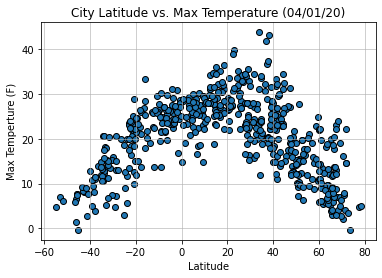

In [13]:
plt.scatter(weather_data["Lat"],weather_data["Max Temp"],edgecolor="black")
plt.ylabel("Max Temperture (F)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Max Temperature (04/01/20)")
plt.grid(alpha=0.75)
plt.savefig('output_data/Lat_vs_Temp.png')
plt.show()

Analysis: Looks like there is a parabolic relationship between latitude and max temp. Which is why it woould be useful to split analysis b/w northern and southern hemisphere

## Latitude vs. Humidity Plot

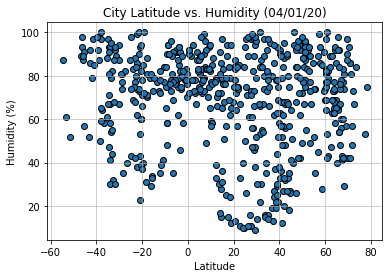

In [14]:
plt.scatter(weather_data["Lat"],weather_data["Humidity"],edgecolor="black")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Humidity (04/01/20)")
plt.grid(alpha=0.75)
plt.savefig('output_data/Lat_vs_Humidity.png')
plt.show()


Analysis: Does not look like there is a linear realationship b/w humidity and the latitude. However, looking at 0 degrees latitude (equator) it looks like those cities are clustering towards high humdity levels

## Latitude vs. Cloudiness Plot

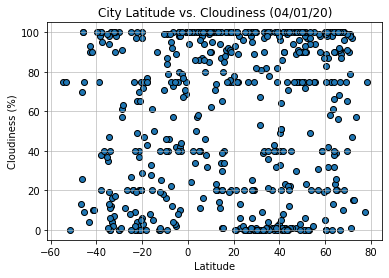

In [15]:
plt.scatter(weather_data["Lat"],weather_data["Cloudiness"],edgecolor="black")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Cloudiness (04/01/20)")
plt.grid(alpha=0.75)
plt.savefig('output_data/Lat_vs_Cloudiness.png')
plt.show()


Analysis: It does not look like there is a linear relationship between cloudiness and latitude. it would be interesting to see how are humidity and cloudiness related. In this scatter plot it seems like either cities have high cloudiness or low, fewer points show in the middle range

## Latitude vs. Wind Speed Plot

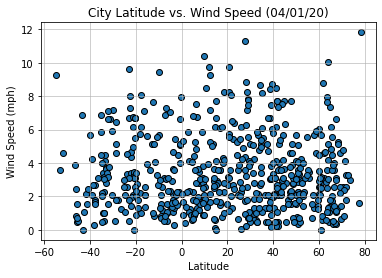

In [17]:
plt.scatter(weather_data["Lat"],weather_data["Wind Speed"],edgecolor="black")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Wind Speed (04/01/20)")
plt.grid(alpha=0.75)
plt.savefig('output_data/Lat_vs_WindSpeed.png')
plt.show()


Analysis: There seems to be some correlation b/w speed and latitude, but not the strongest. A linear regression may help with more definitive answers. 

## Linear Regression

In [18]:
#dividing data sets into two smaller ones for ease of analysis
north_hem=weather_data.loc[(weather_data['Lat']>= 0) ]
south_hem=weather_data.loc[(weather_data['Lat']< 0) ]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.6912117225229792
The p-value is: 1.0956654350310483e-57


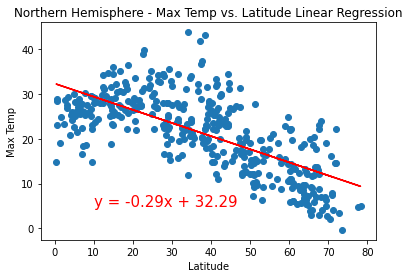

In [19]:
#linear regression model 
x_values=north_hem["Lat"]
y_values=north_hem["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

#Reg line Equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-value is: {rvalue}")
print(f"The p-value is: {pvalue}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.show()


Analysis: 
R value is showing that the correlation coefficient is -0.69, meaning there is a negative correlation b/w max temp and latitude. i.e. if latitude increase, the max temp is likely be lower. In layman terms, as we go further away from the equator towards north, max temps are likely to be lower, therefore, gets colder. 
The p value is also very low, indicating that this relationship is significant based on this data set.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.8200302042585482
The p-value is: 1.522068157157232e-43


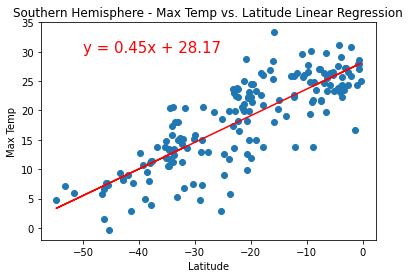

In [20]:
#linear regression model 
x_values=south_hem["Lat"]
y_values=south_hem["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

#Reg line Equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-value is: {rvalue}")
print(f"The p-value is: {pvalue}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.show()


Analysis: R value is showing that the correlation coefficient is +0.82, meaning there is a positive correlation b/w max temp and latitude. i.e. if latitude increases, the max temp is likely be higher. In layman terms, as we go closer to the equator, max temps are likely to be higher, therefore, gets hotter. The p value is also very low, indicating that this relationship is significant based on this data set.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.006485815998793219
The p-value is: 0.8974978322097593


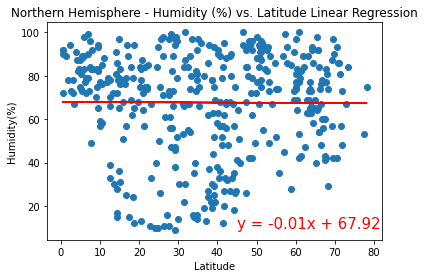

In [21]:
#linear regression model 
x_values=north_hem["Lat"]
y_values=north_hem["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

#Reg line Equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-value is: {rvalue}")
print(f"The p-value is: {pvalue}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.show()

Analysis: R value is showing that the correlation coefficient is -.06, meaning there is a slight negative correlation b/w humidity and latitude. The p value is also high, indicating that this relationship is not significant based on this data set.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0006886698529802582
The p-value is: 0.9928042132803514


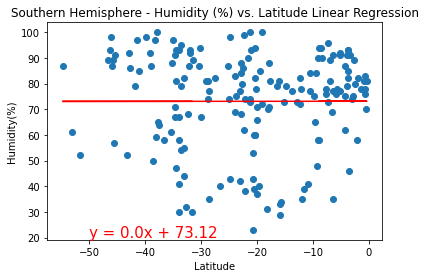

In [22]:
#linear regression model 
x_values=south_hem["Lat"]
y_values=south_hem["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

#Reg line Equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-value is: {rvalue}")
print(f"The p-value is: {pvalue}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.show()

Analysis: R value is showing that the correlation coefficient is 0.0006, meaning there is a very slight positive correlation b/w humidity and latitude. The p value is also high, indicating that this relationship is not significant based on this data set.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.024898422473183555
The p-value is: 0.62087547650498


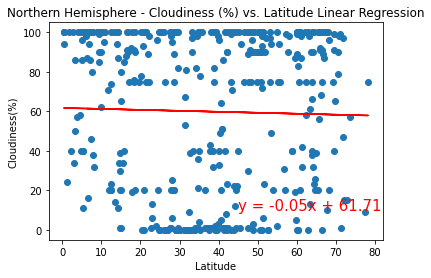

In [23]:
#linear regression model 
x_values=north_hem["Lat"]
y_values=north_hem["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

#Reg line Equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-value is: {rvalue}")
print(f"The p-value is: {pvalue}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.show()

Analysis: R value is showing that the correlation coefficient is -0.024, meaning there is a slight negative correlation b/w cloudiness and latitude. The p value is also high, indicating that this relationship is not significant based on this data set.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.09926782616374197
The p-value is: 0.19250110076411311


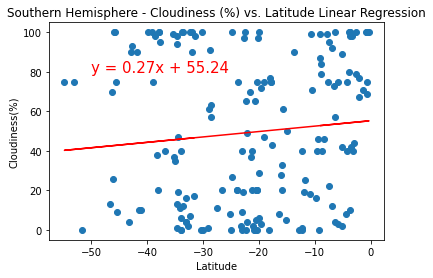

In [24]:
#linear regression model 
x_values=south_hem["Lat"]
y_values=south_hem["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

#Reg line Equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-value is: {rvalue}")
print(f"The p-value is: {pvalue}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.show()

Analysis: R value is showing that the correlation coefficient is +0.09, meaning there is a positive correlation b/w cloudiness and latitude. The p value is also high, indicating that this relationship is not significant based on this data set.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.040524948807554764
The p-value is: 0.4206819681526145


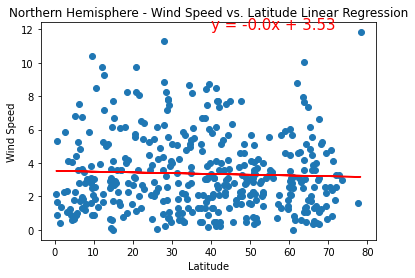

In [25]:
#linear regression model 
x_values=north_hem["Lat"]
y_values=north_hem["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

#Reg line Equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-value is: {rvalue}")
print(f"The p-value is: {pvalue}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,12),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.show()

Analysis: R value is showing that the correlation coefficient is -0.04, meaning there is a negative correlation b/w wind speed and latitude. The p value is also less than 0.05, indicating that this relationship is significant based on this data set.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.016585575287312703
The p-value is: 0.8280393934547311


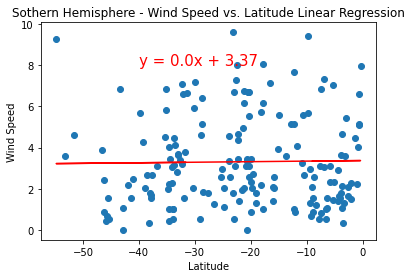

In [26]:
#linear regression model 
x_values=south_hem["Lat"]
y_values=south_hem["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

#Reg line Equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-value is: {rvalue}")
print(f"The p-value is: {pvalue}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Sothern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.show()

Analysis: R value is showing that the correlation coefficient is +0.016, meaning there is a slight positive correlation b/w cloudiness and latitude. The p value is high, indicating that this relationship is not significant based on this data set.

Over all these conclusions can be made:

    *Cities near the equator are hotter than the ones further away from the eqautor.
    
    *Humidity does not seem to have a relationship how far/close the city is from the equator.
    
    *Cloudiness does not seem to have a relationship how far/close the city is from the equator.
    
    *Windspeed does not seem to have a relationship how far/close the city is from the equator.